## Assignment 3

Since the data is conducted __wordCould__, __WordFrequency_ and __Sentiment Analysis__ in *Assignment 2*, to take one step further, the data holder want us to conduct further analysis on the dataset. for example, the **The Topic Modeling**, **TF-IDF Analysis** and so on based on the second hand data cleaned on the original text news. This note book mainly focus on the **TF-IDF** Analysis on the data set.

### 1.1 Data Cleaning and Preparation
In order for the simpliciry of the display and explaination of the TF-IDF, the first **10** documents of the AE countries are selected to illustrate the process to calculate the *TF-IDF*. Then the process can be applied to all the document in the whole country about **Covid-19**.

Firstly, *Load* the data from csv files:

import the packages that are needed:

In [84]:
import pandas as pd
import nltk
from collections import Counter
from nltk.corpus import stopwords
import re
import math

there are several country, so take _AE_ for example:

In [146]:
df = pd.read_csv("./Clean Data/AE_cleandf.csv")
df.head()
df.shape

(964, 7)

in order to be affected by stopwords, better to ignore the stop words when calculating.

In [72]:
stopword_list = stopwords.words('english')
target_tokens = ['humanitarian', 'humanitarianism', 'covid', 'coronavirus', 'covid19', 'virus']

puntuations should alse be removed from the documents:

In [62]:
docs = [re.sub(r'[^\w\s]','', doc.lower()) for doc in df[0:10]['text']]

then just use _nltk_ to tokenize the documents:

In [67]:
token_lists = []
for doc in docs:
    tokens = nltk.word_tokenize(doc)
    token_lists.append([token for token in tokens if token not in stopword_list])

### 2. Calculate the TF
**Term Frequency** refers to the number of times a word appears in a document divided by the total number of words in the document. Every document has its own term frequency.

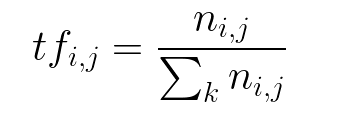

the target is to calculate the tf of the terms that is defined in the *target_tokens*, in order for reusage, define a function to deal with this:

In [82]:
#function to calculate tf(term frequency)
def calWordFrequency(token_list, to_count_list):
    token_set = set(token_list)
    count = len(token_set)
    token_map = dict.fromkeys(token_set, 0)
    for token in token_list:
        token_map[token] = token_map[token] + 1
    
    res = []
    for token in to_count_list:
        if token_map.get(token) is None:
            res.append(0)
        else:
            res.append(token_map[token]/float(count))
        
    return res

In [80]:
doc_token_freq_list = []
for token_list in token_lists:
    doc_freq = calWordFrequency(token_list, target_tokens)
    doc_token_freq_list.append(list(doc_freq))

In [83]:
tf_table = pd.DataFrame(doc_token_freq_list)
tf_table.columns = target_tokens
tf_table

,humanitarian,humanitarianism,covid,coronavirus,covid19,virus
0,0.010811,0,0.000000,0.005405,0.016216,0.000000
1,0.006494,0,0.000000,0.084416,0.000000,0.000000
2,0.006329,0,0.000000,0.022152,0.003165,0.006329
3,0.004237,0,0.000000,0.000000,0.012712,0.000000
4,0.004545,0,0.000000,0.027273,0.009091,0.000000
5,0.024000,0,0.000000,0.032000,0.008000,0.000000
6,0.031073,0,0.000000,0.011299,0.008475,0.000000
7,0.001425,0,0.001425,0.005698,0.024217,0.002849
8,0.005814,0,0.000000,0.023256,0.005814,0.000000
9,0.021390,0,0.000000,0.010695,0.010695,0.000000


### 3. Calculate IDF
The log of the number of documents divided by the number of documents that contain the word w. Inverse data frequency determines the weight of rare words across all documents in the corpus.
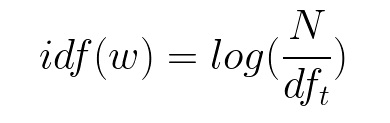

In [104]:
def calIDF(freq_lists, tokens):
    N = 10
    count_map = dict.fromkeys(tokens, 0)
    for freq_list in freq_lists:
        for idx, freq in enumerate(freq_list):
            if freq != 0:
                count_map[tokens[idx]] = count_map[tokens[idx]] + 1
    idf_map = dict.fromkeys(tokens, 0)
    for key,val in count_map.items():
        idf_map[key] = math.log((N + 1) / (val + 1))                       
    return idf_map

In [106]:
idf_map = calIDF(doc_token_freq_list, target_tokens)

### 4. Calculate the TF-IDF
Lastly, the TF-IDF is simply the TF multiplied by IDF.
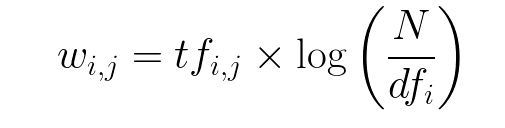

In [109]:
# calculate the TF-IDF function
def calTFIDF(tf_lists, idf_m, tokens):
    tfidf_list = []
    for tf_list in tf_lists:
        tfidf = []
        for idx, tf in enumerate(tf_list):
            tfidf.append(tf * idf_m[tokens[idx]])
        tfidf_list.append(tfidf)
    return tfidf_list

In [111]:
tfidf = calTFIDF(doc_token_freq_list, idf_map, target_tokens)

In [113]:
tfidf_table = pd.DataFrame(tfidf)
tfidf_table.columns = target_tokens
tfidf_table

,humanitarian,humanitarianism,covid,coronavirus,covid19,virus
0,0.0,0.0,0.000000,0.000515,0.001546,0.000000
1,0.0,0.0,0.000000,0.008046,0.000000,0.000000
2,0.0,0.0,0.000000,0.002111,0.000302,0.008223
3,0.0,0.0,0.000000,0.000000,0.001212,0.000000
4,0.0,0.0,0.000000,0.002599,0.000866,0.000000
5,0.0,0.0,0.000000,0.003050,0.000762,0.000000
6,0.0,0.0,0.000000,0.001077,0.000808,0.000000
7,0.0,0.0,0.002428,0.000543,0.002308,0.003702
8,0.0,0.0,0.000000,0.002217,0.000554,0.000000
9,0.0,0.0,0.000000,0.001019,0.001019,0.000000


### 5. Calculate the TF-IDF Using Scikit Learn
The well-known **Scikit Learn** library, which is used for dat processing and deep learning, implement its own TF-IDF algorithmn, then apart from implementing our own, it can also be used.

In [1]:
# use sklearn as TF-IDF analysis
from sklearn.feature_extraction.text import TfidfVectorizer

In [149]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words=stopword_list)
docs = []
for doc in df['text']:
    docs.append(doc)
vectors = vectorizer.fit_transform(docs)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
tfidf_df = pd.DataFrame(denselist, columns=feature_names)

In [150]:
#do tf-idf by selected word list
tfidf_df[target_tokens]

,humanitarian,humanitarianism,covid,coronavirus,covid19,virus
0,0.028218,0.0,0.0,0.015850,0.048453,0.000000
1,0.011391,0.0,0.0,0.166351,0.000000,0.000000
2,0.021661,0.0,0.0,0.085169,0.012398,0.036681
3,0.008957,0.0,0.0,0.000000,0.030761,0.000000
4,0.013774,0.0,0.0,0.092840,0.031534,0.000000
...,...,...,...,...,...,...
959,0.041036,0.0,0.0,0.119860,0.084557,0.013898
960,0.051626,0.0,0.0,0.000000,0.039399,0.000000
961,0.005388,0.0,0.0,0.024211,0.000000,0.000000
962,0.006368,0.0,0.0,0.050076,0.007290,0.000000
